<a href="https://colab.research.google.com/github/Pushku9/sem8/blob/main/sample3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
# Load dataset
data = pd.read_csv('new heart clinical.csv')

In [2]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,aspirin,heparin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,1,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,0,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,1,0


In [3]:
data.shape

(299, 15)

In [5]:
data.isnull().sum()

,0
age,0
anaemia,0
creatinine_phosphokinase,0
diabetes,0
ejection_fraction,0
high_blood_pressure,0
platelets,0
serum_creatinine,0
serum_sodium,0
sex,0


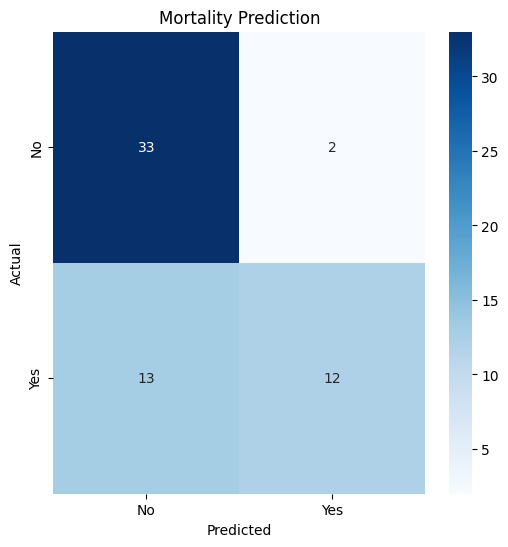

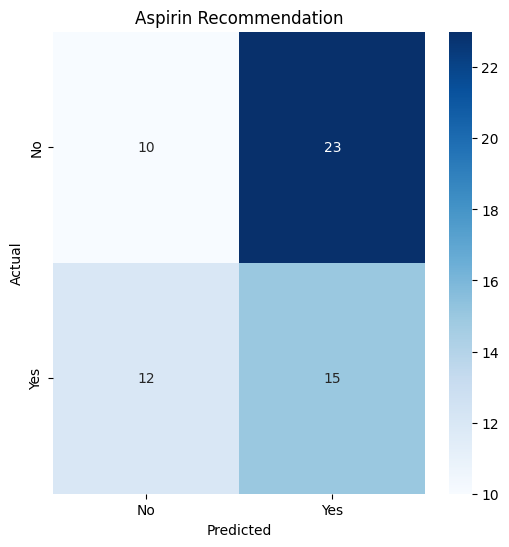

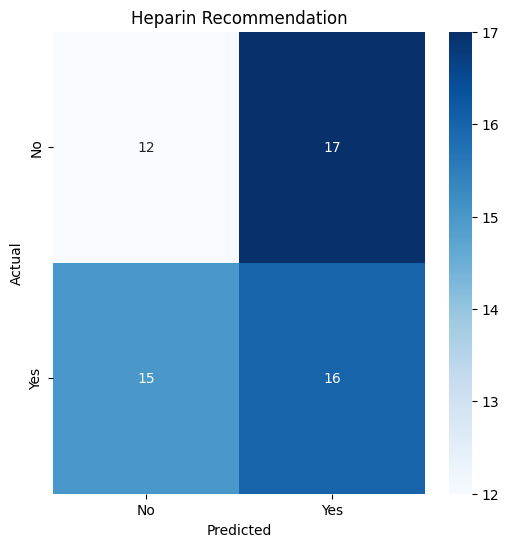

In [ ]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Mortality prediction
outcome_pred = outcome_model.predict(X_test_scaled)
plot_confusion_matrix(y_outcome_test, outcome_pred, 'Mortality Prediction')

# Aspirin recommendation
aspirin_pred = aspirin_model.predict(X_test_scaled)
plot_confusion_matrix(y_aspirin_test, aspirin_pred, 'Aspirin Recommendation')

# Heparin recommendation
heparin_pred = heparin_model.predict(X_test_scaled)
plot_confusion_matrix(y_heparin_test, heparin_pred, 'Heparin Recommendation')

In [ ]:
# Model for mortality prediction
outcome_model = RandomForestClassifier(n_estimators=100, random_state=42)
outcome_model.fit(X_train_scaled, y_outcome_train)

# Model for aspirin recommendation
aspirin_model = RandomForestClassifier(n_estimators=100, random_state=42)
aspirin_model.fit(X_train_scaled, y_aspirin_train)

# Model for heparin recommendation
heparin_model = RandomForestClassifier(n_estimators=100, random_state=42)
heparin_model.fit(X_train_scaled, y_heparin_train)

RandomForestClassifier(random_state=42)

In [ ]:
print("\nMortality Prediction Report:")
print(classification_report(y_outcome_test, outcome_pred))

print("\nAspirin Recommendation Report:")
print(classification_report(y_aspirin_test, aspirin_pred))

print("\nHeparin Recommendation Report:")
print(classification_report(y_heparin_test, heparin_pred))


Mortality Prediction Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60


Aspirin Recommendation Report:
              precision    recall  f1-score   support

           0       0.45      0.30      0.36        33
           1       0.39      0.56      0.46        27

    accuracy                           0.42        60
   macro avg       0.42      0.43      0.41        60
weighted avg       0.43      0.42      0.41        60


Heparin Recommendation Report:
              precision    recall  f1-score   support

           0       0.44      0.41      0.43        29
           1       0.48      0.52      0.50        31

    accuracy                           0.47        60
   macro avg       0.46      0.46 

In [ ]:
def recommend_treatment(patient_data):
    # Scale input
    patient_scaled = scaler.transform([patient_data])

    # Predict probabilities
    outcome_prob = outcome_model.predict_proba(patient_scaled)[0][1]
    aspirin_prob = aspirin_model.predict_proba(patient_scaled)[0][1]
    heparin_prob = heparin_model.predict_proba(patient_scaled)[0][1]

    recommendations = []

    # High mortality risk patients
    if outcome_prob > 0.7:
        if aspirin_prob > 0.5:
            recommendations.append("✅ **High Priority:** Administer Aspirin")
        if heparin_prob > 0.5:
            recommendations.append("✅ **High Priority:** Administer Heparin")
    else:
        if aspirin_prob > 0.7:
            recommendations.append("✔️ Consider Aspirin Therapy")
        if heparin_prob > 0.7:
            recommendations.append("✔️ Consider Heparin Therapy")

    return {
        'Mortality Risk (%)': round(outcome_prob * 100, 2),
        'Aspirin Suitability (%)': round(aspirin_prob * 100, 2),
        'Heparin Suitability (%)': round(heparin_prob * 100, 2),
        'Recommendations': recommendations if recommendations else ["No strong recommendation based on current data"]
    }

# Example usage
sample_patient = X_test.iloc[0].values
print(recommend_treatment(sample_patient))

{'Mortality Risk (%)': np.float64(47.0), 'Aspirin Suitability (%)': np.float64(45.0), 'Heparin Suitability (%)': np.float64(50.0), 'Recommendations': ['No strong recommendation based on current data']}


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


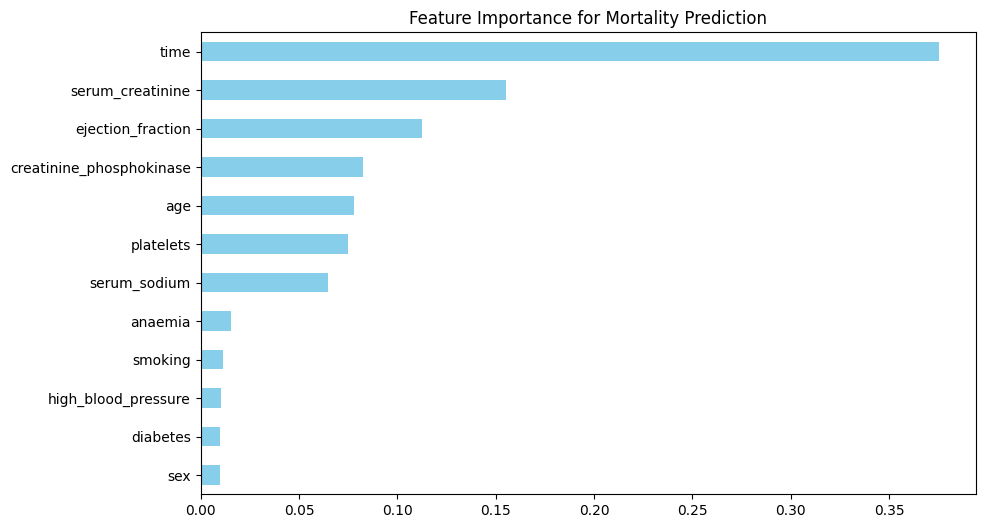

In [ ]:
# Plot feature importance for mortality prediction
plt.figure(figsize=(10, 6))
feature_importances = pd.Series(outcome_model.feature_importances_, index=X.columns)
feature_importances.sort_values().plot(kind='barh', color='skyblue')
plt.title('Feature Importance for Mortality Prediction')
plt.show()

In [ ]:
# Aspirin recommendation model
aspirin_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
aspirin_model.fit(X_train_scaled, y_aspirin_train)

# Heparin recommendation model
heparin_model = LogisticRegression(penalty='l2', C=1.0, solver='liblinear', random_state=42)
heparin_model.fit(X_train_scaled, y_heparin_train)

LogisticRegression(random_state=42, solver='liblinear')

In [ ]:
## Evaluation
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

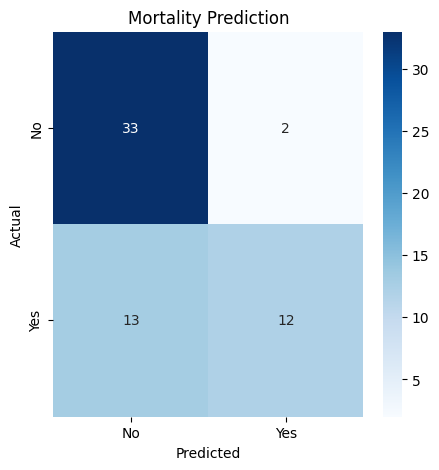

Mortality Prediction Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60

AUC-ROC: 0.8274285714285715


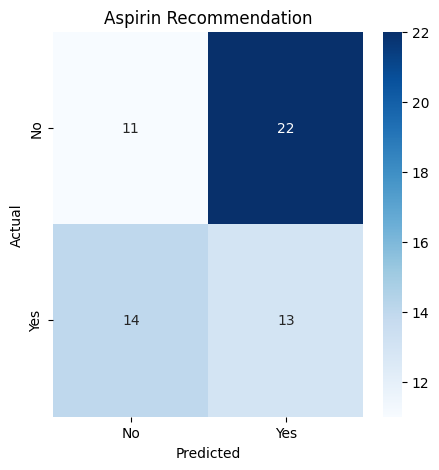


Aspirin Recommendation Report:
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        33
           1       0.37      0.48      0.42        27

    accuracy                           0.40        60
   macro avg       0.41      0.41      0.40        60
weighted avg       0.41      0.40      0.40        60



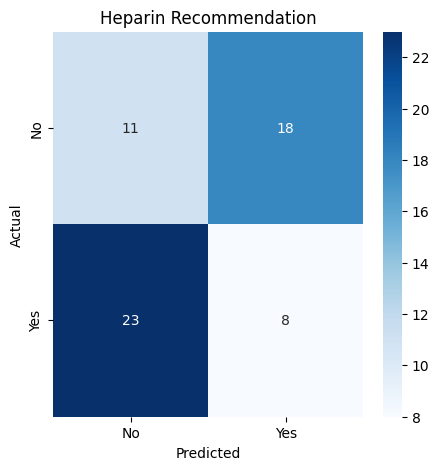


Heparin Recommendation Report:
              precision    recall  f1-score   support

           0       0.32      0.38      0.35        29
           1       0.31      0.26      0.28        31

    accuracy                           0.32        60
   macro avg       0.32      0.32      0.31        60
weighted avg       0.32      0.32      0.31        60



In [ ]:
# Mortality prediction evaluation
outcome_pred = outcome_model.predict(X_test_scaled)
plot_confusion_matrix(y_outcome_test, outcome_pred, 'Mortality Prediction')
print("Mortality Prediction Report:")
print(classification_report(y_outcome_test, outcome_pred))
print("AUC-ROC:", roc_auc_score(y_outcome_test, outcome_model.predict_proba(X_test_scaled)[:,1]))

# Aspirin recommendation evaluation
aspirin_pred = aspirin_model.predict(X_test_scaled)
plot_confusion_matrix(y_aspirin_test, aspirin_pred, 'Aspirin Recommendation')
print("\nAspirin Recommendation Report:")
print(classification_report(y_aspirin_test, aspirin_pred))

# Heparin recommendation evaluation
heparin_pred = heparin_model.predict(X_test_scaled)
plot_confusion_matrix(y_heparin_test, heparin_pred, 'Heparin Recommendation')
print("\nHeparin Recommendation Report:")
print(classification_report(y_heparin_test, heparin_pred))


In [ ]:
## Treatment Recommendation Function
def recommend_treatment(patient_data):
    patient_scaled = scaler.transform([patient_data])

    # Get probabilities
    death_risk = outcome_model.predict_proba(patient_scaled)[0][1]
    aspirin_prob = aspirin_model.predict_proba(patient_scaled)[0][1]
    heparin_prob = heparin_model.predict_proba(patient_scaled)[0][1]

    recommendations = []

    # Clinical decision rules
    if death_risk > 0.65:  # High mortality risk
        if aspirin_prob > 0.6:
            recommendations.append("🚨 HIGH PRIORITY: Start Aspirin (Risk: {:.1f}%)".format(aspirin_prob*100))
        if heparin_prob > 0.6:
            recommendations.append("🚨 HIGH PRIORITY: Start Heparin (Risk: {:.1f}%)".format(heparin_prob*100))
    else:  # Lower risk
        if aspirin_prob > 0.7:
            recommendations.append("💊 Consider Aspirin (Suitability: {:.1f}%)".format(aspirin_prob*100))
        if heparin_prob > 0.7:
            recommendations.append("💉 Consider Heparin (Suitability: {:.1f}%)".format(heparin_prob*100))

    if not recommendations:
        recommendations.append("⚠️ No strong medication recommendation at this time")

    return {
        'Mortality Risk': '{:.1f}%'.format(death_risk*100),
        'Aspirin Suitability': '{:.1f}%'.format(aspirin_prob*100),
        'Heparin Suitability': '{:.1f}%'.format(heparin_prob*100),
        'Clinical Recommendations': recommendations
    }

In [ ]:
# Example usage
sample_patient = X_test.iloc[0].values
recommendation = recommend_treatment(sample_patient)
for key, value in recommendation.items():
    if key == 'Clinical Recommendations':
        print(f"\n{key}:")
        for item in value:
            print(f"- {item}")
    else:
        print(f"{key}: {value}")

Mortality Risk: 47.0%
Aspirin Suitability: 50.0%
Heparin Suitability: 36.7%

Clinical Recommendations:
- ⚠️ No strong medication recommendation at this time


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<ipython-input-49-6981b84a15bd>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')


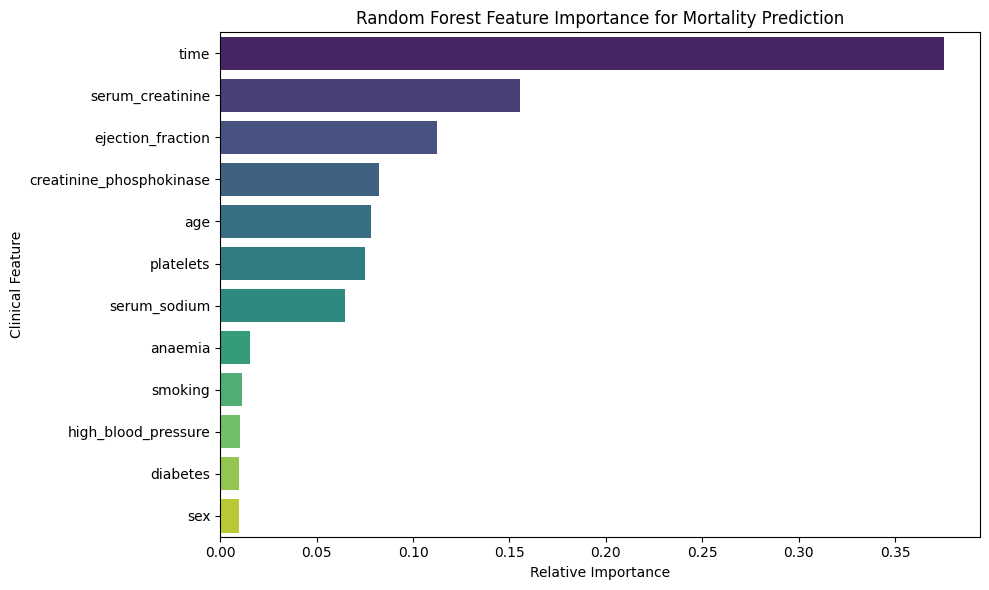

In [ ]:
## Feature Importance Analysis for Random Forest
# Get feature importances
feature_imp = pd.DataFrame({
    'Feature': X.columns,
    'Importance': outcome_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feature_imp, palette='viridis')
plt.title('Random Forest Feature Importance for Mortality Prediction')
plt.xlabel('Relative Importance')
plt.ylabel('Clinical Feature')
plt.tight_layout()
plt.show()

<ipython-input-50-332e6e360987>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')


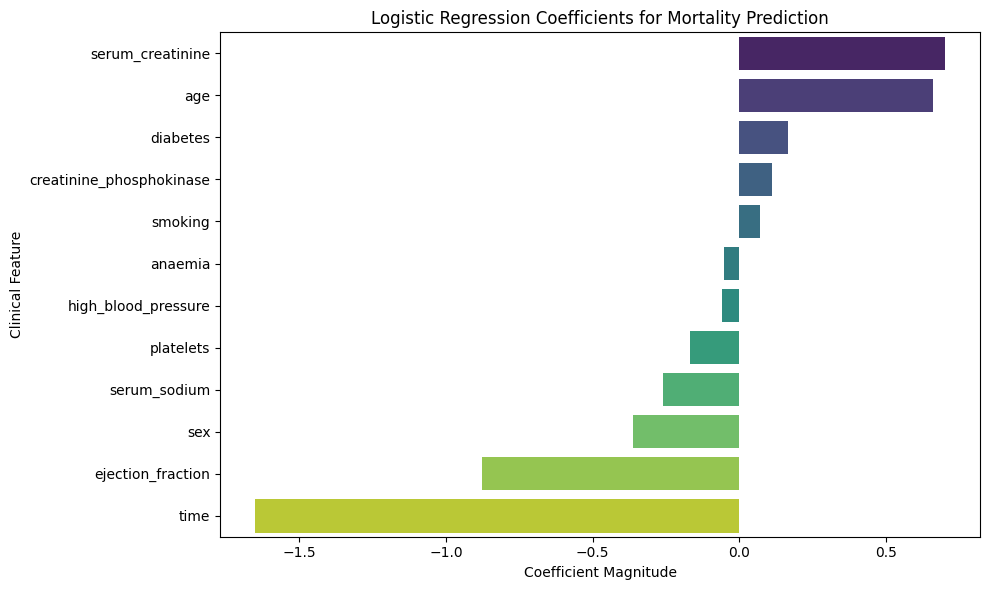

In [ ]:
# Train logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train_scaled, y_outcome_train)

# Get coefficients
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': logreg_model.coef_[0]
}).sort_values('Coefficient', ascending=False)

# Plot coefficients
plt.figure(figsize=(10,6))
sns.barplot(x='Coefficient', y='Feature', data=coef_df, palette='viridis')
plt.title('Logistic Regression Coefficients for Mortality Prediction')
plt.xlabel('Coefficient Magnitude')
plt.ylabel('Clinical Feature')
plt.tight_layout()
plt.show()

In [ ]:
# Train XGBoost models
# Mortality prediction model
outcome_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
outcome_model.fit(X_train_scaled, y_outcome_train)

# Aspirin recommendation model
aspirin_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
aspirin_model.fit(X_train_scaled, y_aspirin_train)

# Heparin recommendation model
heparin_model = xgb.XGBClassifier(
    objective='binary:logistic',
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
heparin_model.fit(X_train_scaled, y_heparin_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)


Mortality Prediction Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.86      0.79        35
           1       0.74      0.56      0.64        25

    accuracy                           0.73        60
   macro avg       0.73      0.71      0.71        60
weighted avg       0.73      0.73      0.73        60

AUC-ROC: 0.8709


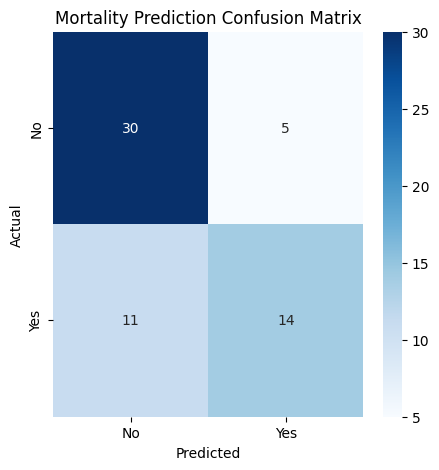


Aspirin Recommendation Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.36      0.42        33
           1       0.42      0.56      0.48        27

    accuracy                           0.45        60
   macro avg       0.46      0.46      0.45        60
weighted avg       0.46      0.45      0.45        60

AUC-ROC: 0.3996


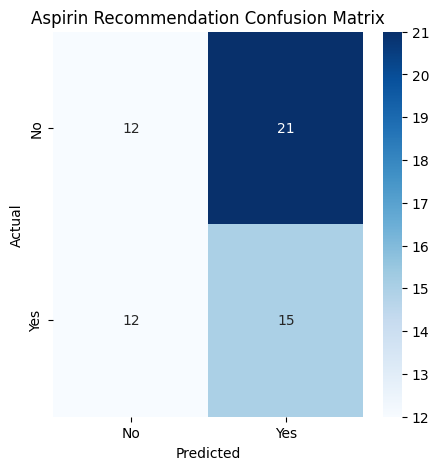


Heparin Recommendation Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.59      0.57        29
           1       0.59      0.55      0.57        31

    accuracy                           0.57        60
   macro avg       0.57      0.57      0.57        60
weighted avg       0.57      0.57      0.57        60

AUC-ROC: 0.5695


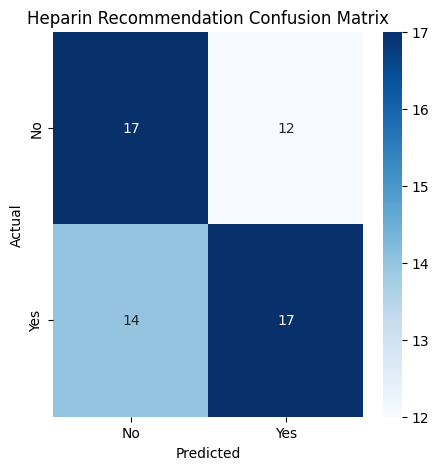

In [ ]:
# Evaluation
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print(f"AUC-ROC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

    # Confusion matrix
    plt.figure(figsize=(5,5))
    sns.heatmap(confusion_matrix(y_test, y_pred),
                annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Yes'],
                yticklabels=['No', 'Yes'])
    plt.title(f'{model_name} Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Evaluate all models
evaluate_model(outcome_model, X_test_scaled, y_outcome_test, "Mortality Prediction")
evaluate_model(aspirin_model, X_test_scaled, y_aspirin_test, "Aspirin Recommendation")
evaluate_model(heparin_model, X_test_scaled, y_heparin_test, "Heparin Recommendation")

In [ ]:
# Treatment recommendation function (XGBoost version)
def xgboost_recommendation(patient_data):
    patient_scaled = scaler.transform([patient_data])

    death_risk = outcome_model.predict_proba(patient_scaled)[0][1]
    aspirin_prob = aspirin_model.predict_proba(patient_scaled)[0][1]
    heparin_prob = heparin_model.predict_proba(patient_scaled)[0][1]

    recommendations = []
    if death_risk > 0.7:
        if aspirin_prob > 0.6:
            recommendations.append(f"🚑 Emergency: Aspirin recommended ({(aspirin_prob*100):.1f}% suitability)")
        if heparin_prob > 0.6:
            recommendations.append(f"🚑 Emergency: Heparin recommended ({(heparin_prob*100):.1f}% suitability)")
    else:
        if aspirin_prob > 0.7:
            recommendations.append(f"💊 Preventive: Aspirin suggested ({(aspirin_prob*100):.1f}% suitability)")
        if heparin_prob > 0.7:
            recommendations.append(f"💉 Preventive: Heparin suggested ({(heparin_prob*100):.1f}% suitability)")

    return {
        'XGBoost Mortality Risk': f"{(death_risk*100):.1f}%",
        'XGBoost Recommendations': recommendations if recommendations else ["No critical recommendations"]
    }

# Example usage
sample_patient = X_test.iloc[0].values
print("\nXGBoost Treatment Recommendation:")
for key, value in xgboost_recommendation(sample_patient).items():
    if isinstance(value, list):
        print(f"{key}:")
        for item in value:
            print(f"  • {item}")
    else:
        print(f"{key}: {value}")


XGBoost Treatment Recommendation:
XGBoost Mortality Risk: 53.9%
XGBoost Recommendations:
  • No critical recommendations


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<Figure size 1200x600 with 0 Axes>

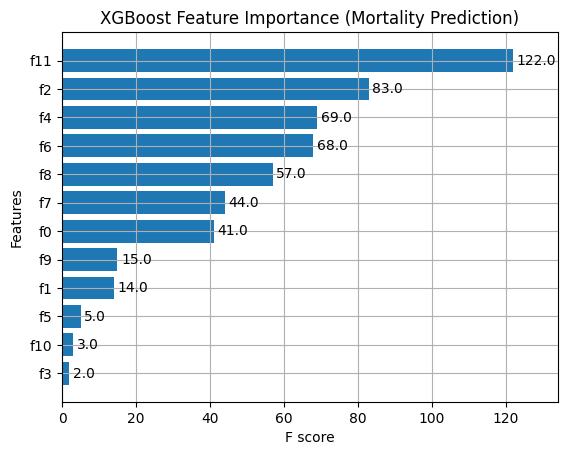

In [ ]:
# Feature importance visualization
plt.figure(figsize=(12, 6))
xgb.plot_importance(outcome_model, importance_type='weight', height=0.8)
plt.title('XGBoost Feature Importance (Mortality Prediction)')
plt.show()
